### Steps:
#### 1- Import necessary libraries
#### 2- Read the yearly deaths dataset
#### 3- Explore the dataset
#### 4- Read and explore the monthly deaths dataset
#### 5- Investigate the number of deaths from 1841 to 1846

### I- Yearly data

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

In [2]:
yearly_death = pd.read_csv(r"C:\Users\USER\Desktop\python training projects\handwashing\Data\yearly_deaths_by_clinic.csv")
yearly_death.info()
yearly_death.describe()
print(yearly_death.head(3))
print(yearly_death["clinic"].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes
   year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
count           12
unique           2
top       clinic 1
freq             6
Name: clinic, dtype: object


In [3]:
#evaluate the number of death from 1841 to 1846
print(yearly_death.groupby("clinic") ["deaths"].sum())


clinic
clinic 1    1989
clinic 2     691
Name: deaths, dtype: int64


#### The above results shows us the number of births and deaths in 2 clinics from the year 1841 till 1846. It's obvious that the number of deaths in clinic 1 is higher than that of clinic 2. 

In [4]:
#calculatin for the proportion of deaths
yearly_death["death proportion"] = yearly_death["deaths"]/ yearly_death["births"]
print(yearly_death)

    year  births  deaths    clinic  death proportion
0   1841    3036     237  clinic 1          0.078063
1   1842    3287     518  clinic 1          0.157591
2   1843    3060     274  clinic 1          0.089542
3   1844    3157     260  clinic 1          0.082357
4   1845    3492     241  clinic 1          0.069015
5   1846    4010     459  clinic 1          0.114464
6   1841    2442      86  clinic 2          0.035217
7   1842    2659     202  clinic 2          0.075968
8   1843    2739     164  clinic 2          0.059876
9   1844    2956      68  clinic 2          0.023004
10  1845    3241      66  clinic 2          0.020364
11  1846    3754     105  clinic 2          0.027970


In [13]:
#separate the table into the two diff clinic

clinic_1 = yearly_death[yearly_death["clinic"] == "clinic 1"]
clinic_2 = yearly_death[yearly_death["clinic"] == "clinic 2"]
print(clinic_1)
print(clinic_2)

   year  births  deaths    clinic  death proportion
0  1841    3036     237  clinic 1          0.078063
1  1842    3287     518  clinic 1          0.157591
2  1843    3060     274  clinic 1          0.089542
3  1844    3157     260  clinic 1          0.082357
4  1845    3492     241  clinic 1          0.069015
5  1846    4010     459  clinic 1          0.114464
    year  births  deaths    clinic  death proportion
6   1841    2442      86  clinic 2          0.035217
7   1842    2659     202  clinic 2          0.075968
8   1843    2739     164  clinic 2          0.059876
9   1844    2956      68  clinic 2          0.023004
10  1845    3241      66  clinic 2          0.020364
11  1846    3754     105  clinic 2          0.027970


#### It seems that 1842 was a pretty hectic year in both clinic 1 & 2 where the numbers of deaths were 518 and 202 respectively

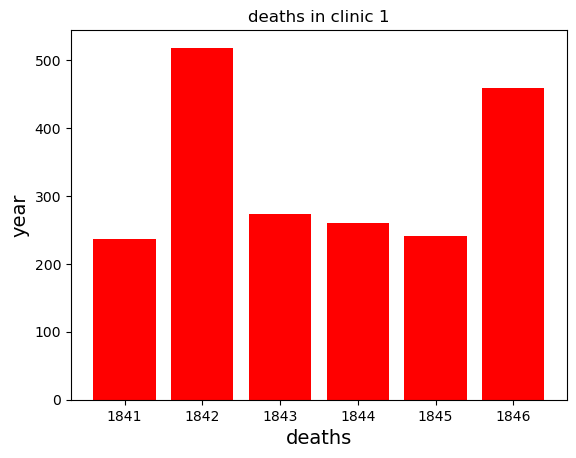

In [17]:
#visualise the number of death every year in the clinics
#clinic 1
plt.bar(clinic_1["year"], clinic_1["deaths"], color= "red")
plt.title("deaths in clinic 1")
plt.xlabel("deaths",fontsize=14)
plt.ylabel("year", fontsize=14)
plt.show()

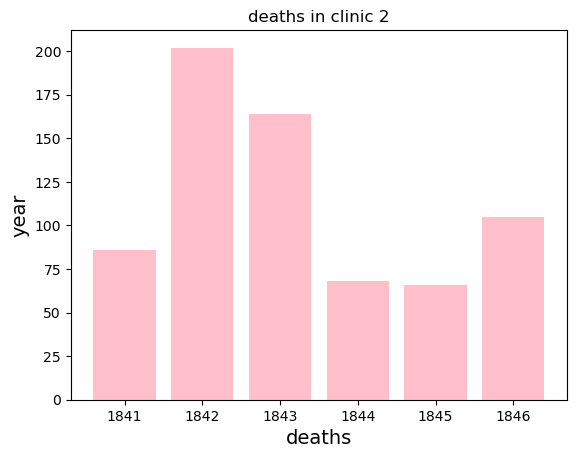

In [16]:
#clinic 2
plt.bar(clinic_2["year"], clinic_2["deaths"], color= "pink")
plt.title("deaths in clinic 2")
plt.xlabel("deaths",fontsize=14)
plt.ylabel("year", fontsize=14)
plt.show()

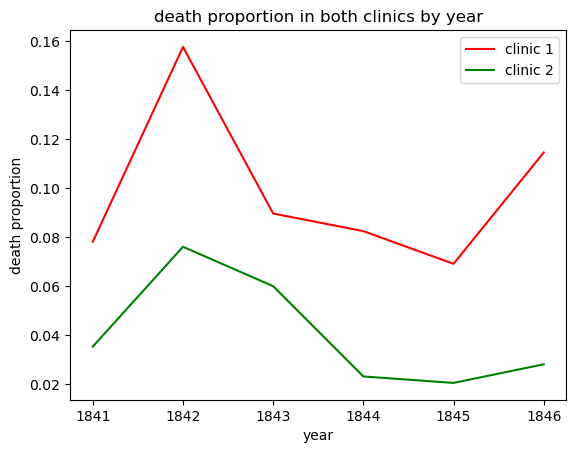

In [25]:
#plot the death proportion in both clinics
plt.plot(clinic_1["year"], clinic_1["death proportion"], color= "red")
plt.plot(clinic_2["year"], clinic_2["death proportion"], color ="green")
plt.title("death proportion in both clinics by year")
plt.xlabel("year")
plt.ylabel("death proportion")
plt.legend(["clinic 1", "clinic 2"])
plt.show()

#### By looking further into why this happened, Dr Semmelweis realized that many medical students worked at clinic 1 who also as a part of their study, spend a lot of time in the autopsy room. So, he realized that dealing with corpses spread bacteria that would be transferred to the women giving birth, infecting them with the deadly childbed fever, which was the main reason for the high mortality rates. 


### II- Monthly data

In [27]:
#monthly data
monthly_death = pd.read_csv(r"C:\Users\USER\Desktop\python training projects\handwashing\Data\monthly_deaths.csv")


In [28]:
#explorin the data
monthly_death.info()
monthly_death.describe()
print(monthly_death.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB
         date  births  deaths
0  1841-01-01     254      37
1  1841-02-01     239      18
2  1841-03-01     277      12


In [30]:
#Calculate the proportion of deaths per month
monthly_death["death proportion"] = monthly_death["deaths"] / monthly_death["births"]
print(monthly_death)

          date  births  deaths  death proportion
0   1841-01-01     254      37          0.145669
1   1841-02-01     239      18          0.075314
2   1841-03-01     277      12          0.043321
3   1841-04-01     255       4          0.015686
4   1841-05-01     255       2          0.007843
..         ...     ...     ...               ...
93  1848-11-01     310       9          0.029032
94  1848-12-01     373       5          0.013405
95  1849-01-01     403       9          0.022333
96  1849-02-01     389      12          0.030848
97  1849-03-01     406      20          0.049261

[98 rows x 4 columns]


#### Dr Semmelweis ordered the doctors to wash their hands and made it obligatory in the summer of 1847 to see if that will affect the number of deaths, and since we have the monthly data now, we can trace the number of deaths before and after the handwashing started. 

In [33]:
#Change the data type of "date" column from string to datatime
monthly_death.dtypes
monthly_death["date"] =  pd.to_datetime(monthly_death["date"])

In [34]:
#date at which handwashing started
start_handwashing = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly_death[monthly_death["date"] < start_handwashing]
after_washing = monthly_death[monthly_death["date"] >= start_handwashing]
print(before_washing)
print(after_washing)

         date  births  deaths  death proportion
0  1841-01-01     254      37          0.145669
1  1841-02-01     239      18          0.075314
2  1841-03-01     277      12          0.043321
3  1841-04-01     255       4          0.015686
4  1841-05-01     255       2          0.007843
..        ...     ...     ...               ...
71 1847-01-01     311      10          0.032154
72 1847-02-01     312       6          0.019231
73 1847-03-01     305      11          0.036066
74 1847-04-01     312      57          0.182692
75 1847-05-01     294      36          0.122449

[76 rows x 4 columns]
         date  births  deaths  death proportion
76 1847-06-01     268       6          0.022388
77 1847-07-01     250       3          0.012000
78 1847-08-01     264       5          0.018939
79 1847-09-01     262      12          0.045802
80 1847-10-01     278      11          0.039568
81 1847-11-01     246      11          0.044715
82 1847-12-01     273       8          0.029304
83 1848-01-01    

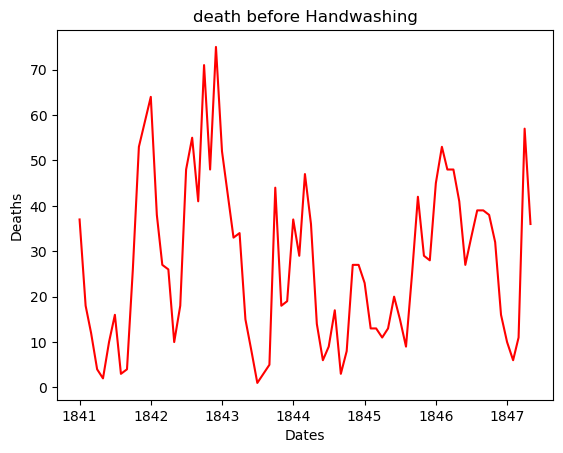

In [36]:
#visualising the number of deaths before handwashing
plt.plot(before_washing["date"], before_washing["deaths"], color= "red")
plt.title("death before Handwashing")
plt.xlabel("Dates")
plt.ylabel("Deaths")
plt.show()

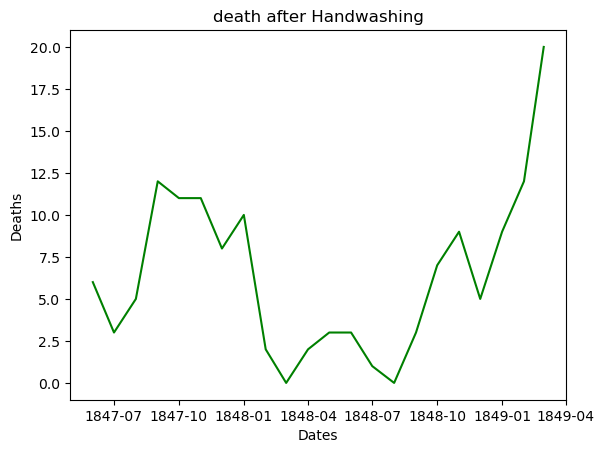

In [37]:
#visualising the number of deaths after handwashing
plt.plot(after_washing["date"], after_washing["deaths"], color= "green")
plt.title("death after Handwashing")
plt.xlabel("Dates")
plt.ylabel("Deaths")
plt.show()

#### To see the difference clearly, let's combine the 2 plots in one chart.

C:\Users\USER\AppData\Local\Temp\ipykernel_12356\1399427252.py:6: UserWarning: The label '_' of 'e' starts with '_'. It is thus excluded from the legend.
  plt.legend("before_washing", "after_washing")
C:\Users\USER\AppData\Local\Temp\ipykernel_12356\1399427252.py:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("before_washing", "after_washing")


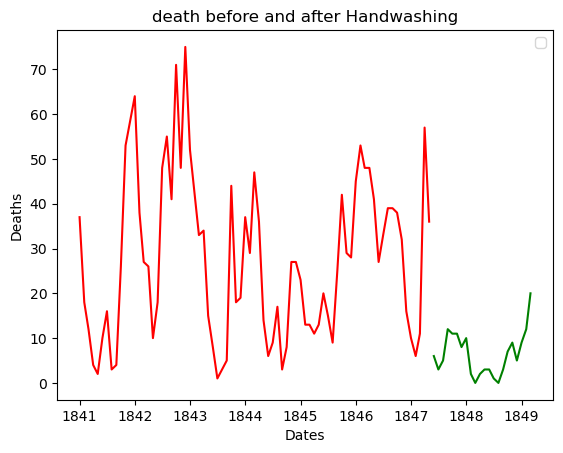

In [41]:
plt.plot(before_washing["date"], before_washing["deaths"], color= "red")
plt.plot(after_washing["date"], after_washing["deaths"], color= "green")
plt.title("death before and after Handwashing")
plt.xlabel("Dates")
plt.ylabel("Deaths")
plt.legend("before_washing", "after_washing")
plt.show()

#### The difference is pretty clear! the proportion of deaths dramatically decreased after handwashing was made obligatory.

#### Let's calculate exactly how much did handwashing decreased the proportion of deaths on average.

In [44]:
before_proportion = before_washing["death proportion"]
after_proportion = after_washing["death proportion"]


In [47]:
#death decrease
mean_diff = after_proportion.mean() - before_proportion.mean()

In [48]:
print(mean_diff)

-0.08395660751183336


#### The minus sign indicate that there is a decrease. So handwashing decreased the proportion of deaths by approximately 8%.